In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import cv2
loc = '/content/drive/My Drive/dataset'

In [4]:
import os
label = []
for i in os.listdir(loc):
  if(i.split('.')[0]== 'cat'):
    label.append(0)
  else:
    label.append(1)

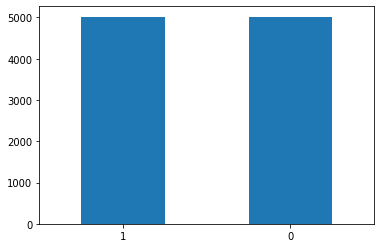

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
label = pd.DataFrame(label)
label[0].value_counts().plot.bar(rot=0)


In [6]:
label.shape

(10028, 1)

In [7]:
from tqdm import tqdm
features = []
for i in tqdm(os.listdir(loc)):
  path = os.path.join(loc,i)
  f = cv2.imread(path)
  fr = cv2.resize(f,(70,70))
  features.append(fr)

100%|██████████| 10028/10028 [1:28:02<00:00,  1.90it/s]


In [9]:
 import numpy as np
X = np.array(features)
Y = np.array(label)

In [10]:
X.shape

(10028, 70, 70, 3)

In [11]:
Xt = X.reshape(10028,14700)

In [ ]:
import pandas as pd
pd.DataFrame(Xt).to_csv('cat_dog.csv')

In [12]:
Xt = Xt/Xt.max()

In [13]:
Xt.shape[1]

14700

In [14]:
import keras
from keras import layers
from keras.utils import to_categorical


Using TensorFlow backend.


In [15]:
model = keras.Sequential()
model.add(layers.Dense(200, activation = 'relu' , input_dim = Xt.shape[1]))
model.add(layers.Dense(100 , activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [16]:
Yt = to_categorical(Y)

In [17]:
Yt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
pd.DataFrame(Yt).to_csv('cat_dog_labels.csv')


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2940200   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 2,960,502
Trainable params: 2,960,502
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [81]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,test_size=0.25,random_state =1)

In [82]:
xtrain.shape

(7521, 14700)

In [83]:
ytrain.shape

(7521, 2)

In [99]:
f= model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
7521/7521 [==============================] - 2s 207us/step - loss: 0.0417 - accuracy: 0.9900
Epoch 2/15
7521/7521 [==============================] - 2s 208us/step - loss: 0.0594 - accuracy: 0.9824
Epoch 3/15
7521/7521 [==============================] - 2s 205us/step - loss: 0.0413 - accuracy: 0.9903
Epoch 4/15
7521/7521 [==============================] - 2s 209us/step - loss: 0.0251 - accuracy: 0.9948
Epoch 5/15
7521/7521 [==============================] - 2s 207us/step - loss: 0.0235 - accuracy: 0.9947
Epoch 6/15
7521/7521 [==============================] - 2s 213us/step - loss: 0.0166 - accuracy: 0.9980
Epoch 7/15
7521/7521 [==============================] - 2s 226us/step - loss: 0.0593 - accuracy: 0.9874
Epoch 8/15
7521/7521 [==============================] - 2s 225us/step - loss: 0.0188 - accuracy: 0.9977
Epoch 9/15
7521/7521 [==============================] - 2s 226us/step - loss: 0.0171 - accuracy: 0.9979
Epoch 10/15
7521/7521 [==============================] - 2s 230u

In [100]:
model.evaluate(xtest,ytest)

2507/2507 [==============================] - 0s 140us/step


[0.35472556473156064, 0.8775428533554077]

In [101]:
 model.save('cat_dog_classifier.h5')

In [102]:
p = ['cat','dog']

In [103]:
k = cv2.imread('cat4.jpg')
kt = cv2.resize(k,(70,70))
model.predict(kt.reshape(1,14700))


array([[1., 0.]], dtype=float32)

In [104]:
p[np.argmax(model.predict(kt.reshape(1,14700)))]

'cat'

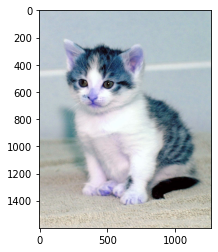

In [105]:
plt.imshow(k)
plt.show()


In [123]:
k1 = cv2.imread('dog.jpg')
kt1 = cv2.resize(k1,(70,70))
model.predict(kt1.reshape(1,14700))

array([[0., 1.]], dtype=float32)

In [125]:
p[np.argmax(model.predict(kt1.reshape(1,14700)))]

'dog'

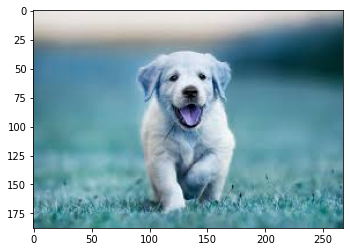

In [126]:
plt.imshow(k1)
plt.show()